<a href="https://colab.research.google.com/github/BhaswatiRoy/Machine-Learning-Projects/blob/main/Product_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv("Product Analysis.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
#values=>convert automaically to numpy array
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [ ]:
#scaling means to convert values to a range which shows equivalent values
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x=scalar.fit_transform(x)
#y is not needed to scale

In [ ]:
#splitting the dataset to training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Applying Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_preds_lr=model_lr.predict(x_test)
y_preds_lr

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
#to measure accuracy of classification problem we need a confusion matrix
cm_lr=confusion_matrix(y_test,y_preds_lr)
cm_lr

array([[57,  1],
       [ 5, 17]])

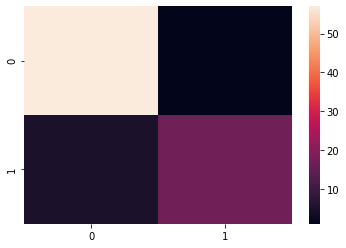

In [ ]:
sns.heatmap(cm_lr)

**Applying Support Vector Machines Classifier**

In [ ]:
from sklearn.svm import SVC
model_svc=SVC(kernel="linear")
model_svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_preds_svc=model_svc.predict(x_test)
y_preds_svc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
cm_svc=confusion_matrix(y_test,y_preds_svc)
cm_svc

array([[57,  1],
       [ 6, 16]])

**Applying K Nearest Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#for binary classification problem using n=3 is a good choice
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_preds_knn=model_knn.predict(x_test)
y_preds_knn

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
cm_knn=confusion_matrix(y_test,y_preds_knn)
cm_knn

array([[55,  3],
       [ 1, 21]])

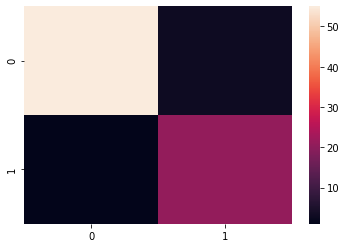

In [ ]:
sns.heatmap(cm_knn)

**Applying Decision Tree Classifier**



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(max_leaf_nodes=10)
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_preds_tree=model_tree.predict(x_test)
y_preds_tree

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

[Text(167.4, 199.32, 'X[0] <= 0.654\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(103.01538461538462, 163.07999999999998, 'X[1] <= 0.61\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(51.50769230769231, 126.83999999999999, 'X[0] <= -0.11\ngini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(25.753846153846155, 90.6, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(77.26153846153846, 90.6, 'gini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(154.52307692307693, 126.83999999999999, 'X[0] <= -1.065\ngini = 0.245\nsamples = 42\nvalue = [6, 36]'),
 Text(128.76923076923077, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(180.27692307692308, 90.6, 'gini = 0.214\nsamples = 41\nvalue = [5, 36]'),
 Text(231.7846153846154, 163.07999999999998, 'X[1] <= -0.829\ngini = 0.273\nsamples = 92\nvalue = [15, 77]'),
 Text(206.03076923076924, 126.83999999999999, 'gini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(257.53846153846155, 126.83999999999999, 'X[1] <= 0.463\ng

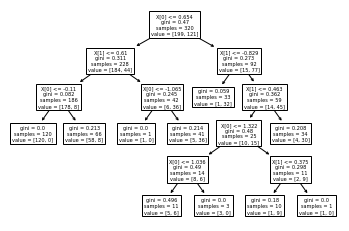

In [ ]:
#visualising all the nodes of decision tree generated
from sklearn import tree
tree.plot_tree(model_tree.fit(x_train,y_train))

In [ ]:
cm_tree=confusion_matrix(y_test,y_preds_tree)
cm_tree

array([[55,  3],
       [ 2, 20]])

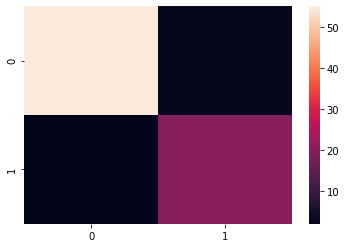

In [ ]:
sns.heatmap(cm_tree)

**Applying Random Forest Classifier**

In [ ]:
#ensemble learning is helpful for larger datasets not small datasets like this
#if used for small datasets it leads to overfitting of model
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(max_leaf_nodes=10)
model_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_preds_forest=model_forest.predict(x_test)
y_preds_forest

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
cm_forest=confusion_matrix(y_test,y_preds_forest)
cm_forest

array([[55,  3],
       [ 1, 21]])

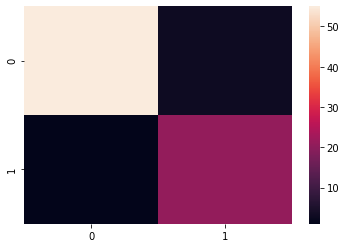

In [ ]:
sns.heatmap(cm_forest)

In [ ]:
#Naive Bayes is mainly used when all features have categorical values to get best result
#when used for numerical features there is lower accuracy than other classification problems
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_preds_nb=model_nb.predict(x_test)
y_preds_nb

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
cm_nb=confusion_matrix(y_test,y_preds_nb)
cm_nb

array([[55,  3],
       [ 4, 18]])

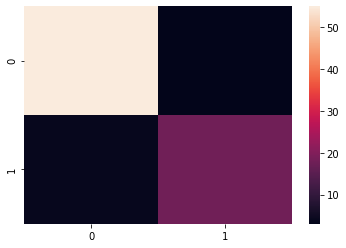

In [ ]:
sns.heatmap(cm_nb)